# GenAI with Python

###### [Article: medium](https://medium.com/towards-data-science/genai-with-python-rag-with-llm-complete-tutorial-c276dda6707b)

## Versión modificada cgv

### Data

In [ ]:
# En un ambiente Mac, usar
# brew install poppler

pages: 96


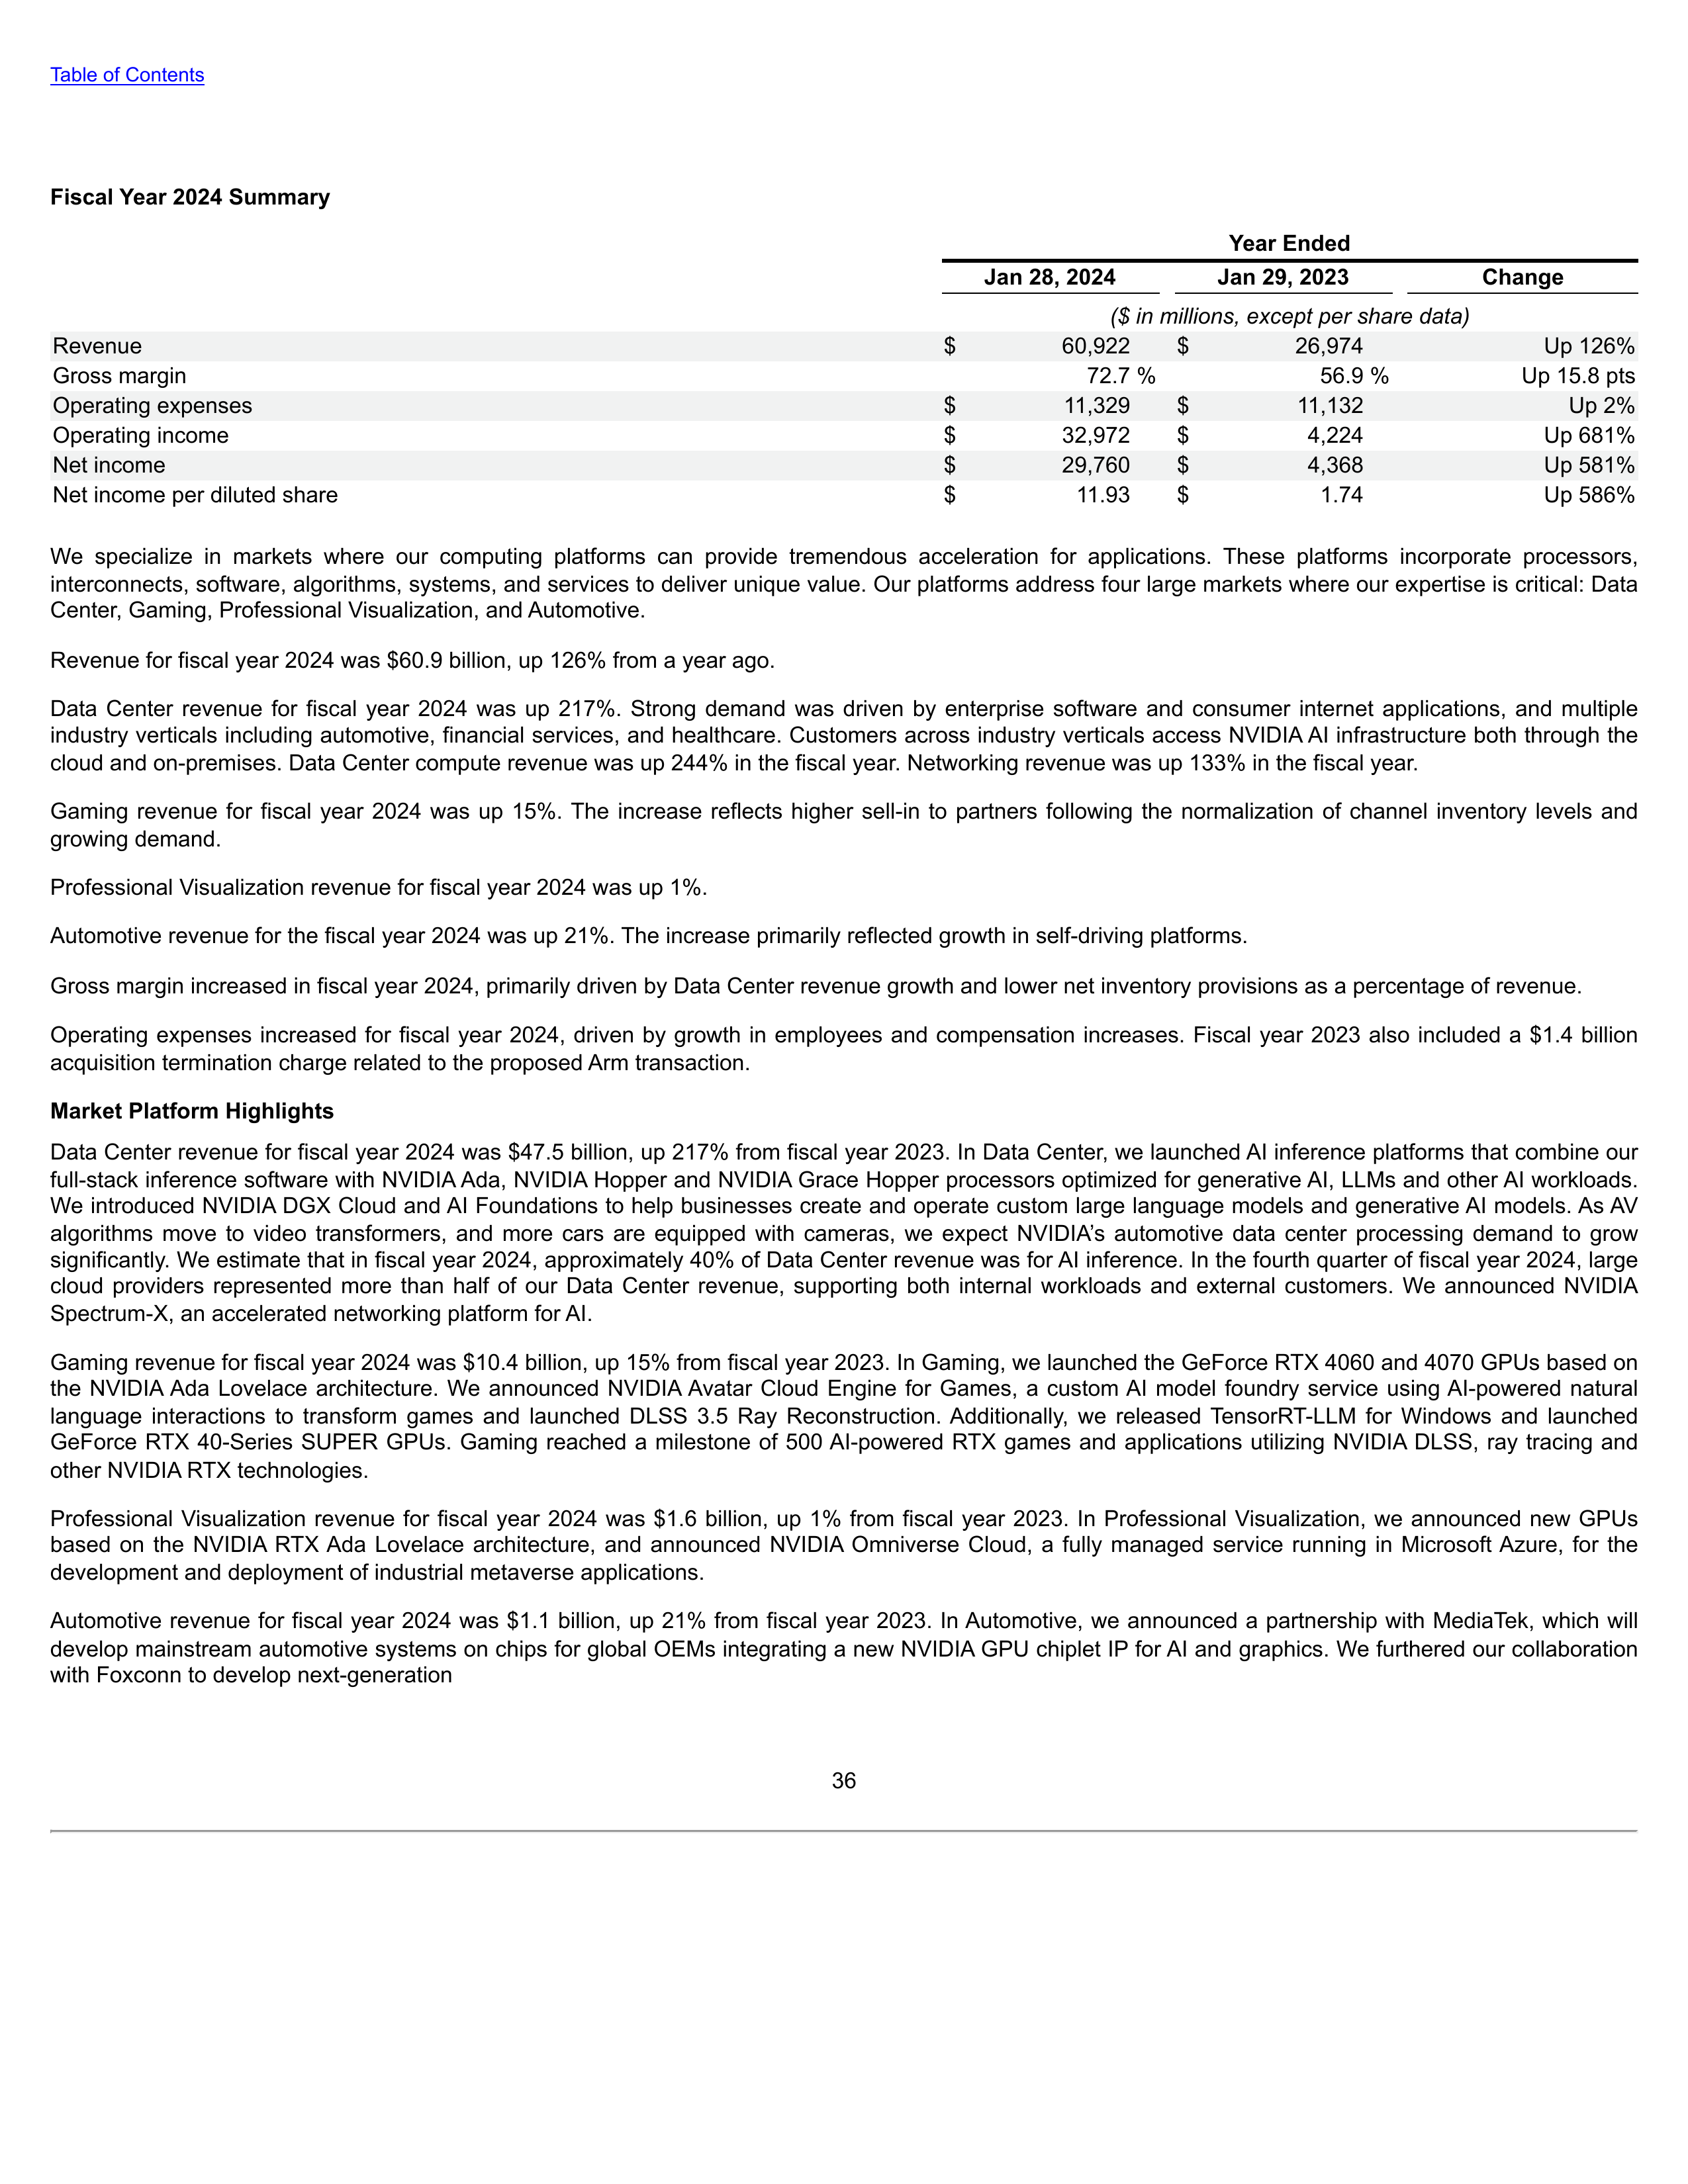

In [ ]:
import pdf2image #1.17.0

# Ensure the path to the PDF file is correct and the file exists
pdf_path = "data/doc_nvidia.pdf"
pag = 35
try:
    doc_img = pdf2image.convert_from_path(pdf_path, dpi=300)
    print("pages:", len(doc_img))
    # Ensure the page index is within the range of available pages
    if len(doc_img) > pag:
        display(doc_img[pag])
    else:
        print(f"The document has fewer than {pag} pages.")
except Exception as e:
    print(f"An error occurred: {e}")

In [3]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Además se usó brew install tesseract y brew install tesseract-lang. Así sí funcionó

In [ ]:
import pytesseract #0.3.13
from tqdm.notebook import tqdm

# Ensure the path to the Tesseract executable is correct
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'  # Example for macOS. Depending on the installation, done in the previous cell (brew install tesseract)
# pytesseract.pytesseract.tesseract_cmd = r'/Users/carlos/Docs/projects/GenerativeAI/.venv/bin/pytesseract'  # Example for macOS
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Example for Windows

doc_txt = []

try:
    for page in tqdm(doc_img):
        text = pytesseract.image_to_string(page)
        doc_txt.append(text)
    print(doc_txt[35])
except pytesseract.TesseractError as e:
    print(f"TesseractError: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

  0%|          | 0/96 [00:00<?, ?it/s]

Table of Contents

Fiscal Year 2024 Summary

Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data
Center, Gaming, Professional Visualization, and Automotive.

Revenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago.

Data Center revenue for fiscal year 2024 was up 217%. Strong demand was driven by enterprise software and consumer internet applications, and multiple
industry verticals includin

### Preprocessing

In [6]:
title_map = {
    "4-12":"Business",
    "13-33":"Risk Factors",
    "34-44":"Financials",
    "45-46":"Directors",
    "47-83":"Data"
}

In [8]:
lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in enumerate(doc_txt):
    try:
        ## get title
        title = [v for k,v in title_map.items() if n in range(int(k.split("-")[0]), int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get paragraph
        for i,p in enumerate(page.split('\n\n')):
            if len(p.strip())>5:
                lst_docs.append(p.strip())
                lst_ids.append(str(n)+"_"+str(i))
                lst_metadata.append({"title":title})
    except:
        continue

print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

1081 = 1081 = 1081


In [9]:
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials'} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data
Center, Gaming, Professional Visualization, and Automotive. 



### LLM Generator

#### TEXT

##### Using `deepseek`

ALGO le pasa con el español (u otro idioma diferente al Inglés). La respuesta la da en inglés.

Al ser más específico pidiendo la respuesta en español, hace el análisis en inglés y traduce la respuesta a español. Al pedirle la respuesta en francés no funcionó en una primera instancia, en una segunda ejecución sí funcionó

In [10]:
import ollama #0.2.1

def keyword_generator_deepseek(p, top=3):
    prompt = "summarize the following paragraph in 3 keywords separated by ,: "+p
#    prompt = "Resuma el siguiente párrafo en 3 conceptos clave separados por , : "+p ## ALGO le pasa con el español. La respuesta la da en inglés
#    # Example usage of the deepseek-r1:1.5b model
#    # prompt = "Generate a summary for the following text: " + p
    res = ollama.generate(model="deepseek-r1:1.5b", prompt=prompt)["response"]
    # Remove the analysis part delimited by <think> and </think>
    if "<think>" in res and "</think>" in res:
        res = res.split("<think>")[0] + res.split("</think>")[-1]
    return res.replace("\n"," ").strip()

p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print("Summary using deepseek-r1:1.5b model:\n", keyword_generator_deepseek(p))


Summary using deepseek-r1:1.5b model:
 NVIDIA GPU, professional artists/architects/designers, generative AI


##### Using `phi3`
La respuesta sí la puede dar en otro idioma auncuando el prompt esté en inglés, por ejemplo. Funcionó con español, francés, alemán e italiano al tiempo, ...

In [11]:
import ollama #0.2.1

def keyword_generator(p, top=3):
    prompt = "summarize the following paragraph in 3 keywords separated by , "+p
    res = ollama.generate(model="phi3", prompt=prompt)["response"]

    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()

p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print("Summary using phi3 model:\n", keyword_generator(p))

Summary using phi3 model:
 Creative Design, Generative AI, NVIDIA Workstations


##### Summary using `deepseek-r1:1.5b` model:

 <think> Okay, I need to help the user summarize a paragraph into three keywords separated by commas. The original text talks about professional artists, architects, and designers using NVIDIA's GPU-accelerated software platform for creative and design tasks. There are also mentions of generative AI expanding the market for GPUs with enterprise customers developing applications on-premises.  First, I should identify the main elements here. The key points are NVIDIA's partnership products, GPU acceleration for various projects, the use cases mentioned (like movies and buildings), and the role of generative AI in supporting this technology across enterprises.  I need to capture each unique aspect without getting too wordy. "NVIDIA GPU-accelerated software platform" seems to be a primary keyword since it's the technology being used. Then, "creative and design applications" because that's one of the use cases they mentioned. Lastly, the part about generative AI expanding GPUs on-premises is another important point.  Putting them together in three clear keywords: NVIDIA GPU-accelerated software platform, creative and design applications, and generative AI's role. I should make sure each keyword stands out without losing any key information from the paragraph. </think>  NVIDIA GPU-accelerated software platform, creative and design applications, generative AI's role in expanding GPUs market on-premises

##### Summary using `Phi3` model:

NVIDIA Partner Products, Creative Industries, Generative AI Expansion  (Note: The keywords reflect professional artists' use cases for creativity in movies or designing buildings/products using NVIDIA partner products and GPU accelerated software platforms; additionally the paragraph also mentions that generative Al is expanding market demand specifically with enterprise customers developing on-premises applications, thus all three terms are relevant.)

In [12]:
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator_deepseek(doc)

0it [00:00, ?it/s]

In [ ]:
## ORIGINAL
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator(doc) 

In [27]:
lst_metadata

[{'title': 'Business',
  'keywords': 'simulation, climate, global supercomputing'},
 {'title': 'Business',
  'keywords': 'Gaming GPUs, Market Expansion, Generative AI'},
 {'title': 'Business',
  'keywords': 'NVIDIA GPU acceleration, generative AI expansion, creative/visual effects.'},
 {'title': 'Business', 'keywords': 'California, April 1993, Delaware'},
 {'title': 'Business', 'keywords': 'report , two segments , results'},
 {'title': 'Business',
  'keywords': 'Compute & Networking, Accelerated Computing Platforms, End-to-End Networking Platforms, Quantum for InfiniBand, Spectrum for Ethernet, NVIDIA DRIVE Platform, Automotive Development Agreements, Jetson Robotics, Embedded Platforms, NVIDIAAI Enterprise, DGX Cloud'},
 {'title': 'Business',
  'keywords': '- NVIDIA GPUs for gaming and PCs   - GeForce NOW game streaming service   - NVIDIA Quadro cards   - NVIDIA RTX GPUs for enterprise workstations   - vGPUs for cloud-based visual and virtual computing   - Automotive platforms (e.g., 

In [28]:
lst_docs

['Researchers and developers use our computing solutions to accelerate a wide range of important applications, from simulating molecular dynamics to climate\nforecasting. With support for more than 3,500 applications, NVIDIA computing enables some of the most promising areas of discovery, from climate prediction to\nmaterials science and from wind tunnel simulation to genomics. Including GPUs and networking, NVIDIA powers over 75% of the supercomputers on the global\nTOP500 list, including 24 of the top 30 systems on the Green500 list.',
 'Gamers choose NVIDIA GPUs to enjoy immersive, increasingly cinematic virtual worlds. In addition to serving the growing number of gamers, the market for PC\nGPUs is expanding because of the burgeoning population of live streamers, broadcasters, artists, and creators. With the advent of generative Al, we expect a\nbroader set of PC users to choose NVIDIA GPUs for running generative Al applications locally on their PC, which is critical for privacy, la

In [29]:
lst_ids

['4_1',
 '4_2',
 '4_3',
 '4_4',
 '4_5',
 '4_6',
 '4_7',
 '4_8',
 '4_9',
 '4_10',
 '4_11',
 '4_12',
 '4_13',
 '4_14',
 '5_1',
 '5_2',
 '5_3',
 '5_4',
 '5_5',
 '5_6',
 '5_7',
 '5_8',
 '5_9',
 '5_10',
 '5_11',
 '5_12',
 '5_13',
 '5_14',
 '6_1',
 '6_2',
 '6_3',
 '6_4',
 '6_5',
 '6_6',
 '6_7',
 '7_1',
 '7_2',
 '7_3',
 '7_4',
 '7_5',
 '7_6',
 '7_7',
 '7_8',
 '7_9',
 '7_10',
 '7_11',
 '8_1',
 '8_2',
 '8_3',
 '8_4',
 '8_5',
 '8_6',
 '8_7',
 '8_8',
 '8_9',
 '8_10',
 '8_11',
 '8_12',
 '8_13',
 '8_14',
 '8_15',
 '8_16',
 '9_1',
 '9_2',
 '9_3',
 '9_4',
 '9_5',
 '9_6',
 '9_7',
 '9_8',
 '9_9',
 '9_10',
 '9_11',
 '9_12',
 '9_13',
 '10_1',
 '10_2',
 '10_3',
 '10_4',
 '10_5',
 '10_6',
 '10_7',
 '10_8',
 '10_9',
 '10_10',
 '10_11',
 '10_12',
 '10_13',
 '10_14',
 '10_15',
 '11_1',
 '11_2',
 '11_3',
 '11_4',
 '11_5',
 '11_6',
 '11_7',
 '11_8',
 '11_9',
 '11_10',
 '11_11',
 '11_12',
 '11_13',
 '11_14',
 '11_15',
 '11_16',
 '11_17',
 '11_18',
 '12_1',
 '12_2',
 '12_3',
 '12_4',
 '12_5',
 '12_6',
 '12_7',
 '

In [25]:
## Print example
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials', 'keywords': 'Revenue Growth, Net Income, Operating Margin'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials', 'keywords': 'revenue up, gross margin up, profit up'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials', 'keywords': "The platform's components are processors, interconnects, software, algorithms, systems, and services, offering unique value in data centers, gaming, professional visualization, and automotive sectors through acceleration for applications."} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, a

#### TABLE

In [24]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Summarize the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

Table:
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

Summary:
 The table compares the financial results for two consecutive years, ending on January 28 and Jan. 29 of each respective year (Jan 2024 versus Jan. 2023). Revenue has surged by 126%, from $26,974 million to $60,922 million. Gross margin also increased substantially, up 15.8 percentage points from 56.9% to 72.7%. Despite a marginal increase of only 2% in operating expenses (from $11,132 million to $11,329 million), the company's operating income saw an incredible rise by 681%, from $4,224 million to $32,972 million. Net income followed a similar trend with a substantial increase of 581% (from $4,368 million to $29,760 million). When it comes to n

In [ ]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Give a concise summary of the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

#### IMAGES

Matplotlib is building the font cache; this may take a moment.


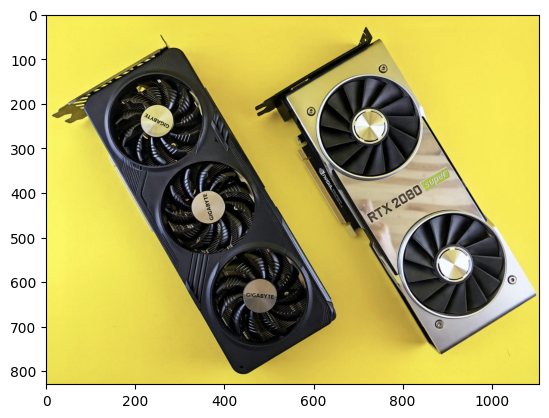

In [17]:
from matplotlib import image, pyplot

image_file = "data/image.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [18]:
## Encode the image into a string
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

img = encode_image(image_file)
img[:1000]

'iVBORw0KGgoAAAANSUhEUgAABFQAAAM+CAYAAAA0NVXiAAAKrWlDQ1BJQ0MgUHJvZmlsZQAASImVlwdQU+kWgP9700NCS4iAlNCb9BZASggtgIJ0EIWQBAglxEBQsSPiCq4FFRFUBF0VUHBViiwiIoqFRUDB7oIsCsq6WLCh8i4whN19896bd2bOnO+ee/5zzv/P/WfOBYAszxGJUmB5AFKFGeIgb3d6RGQUHTcMMIAG8EAd6HC46SJmYKA/QGTW/l0+9AFoyt4xncr17+//qyjw+OlcAKBAhON46dxUhM8j+pIrEmcAgDqC+HVWZoimuA1hqhhpEOH7U5www6NTHDfNaDAdExLEQpgKAJ7E4YgTACDRET89k5uA5CG5IWwh5AmECIsQdklNTeMhfAZhQyQG8ZGm8jPi/pIn4W8546Q5OZwEKc/sZVrwHoJ0UQpn9f95HP9bUlMkszX0ESUlin2CEKuInNn95DQ/KQvjFgfMsoA3HT/NiRKf0FnmprOiZpnH8fCTrk1Z7D/L8QIvtjRPBjtklvnpnsGzLE4LktaKF7OYs8wRz9WVJIdK/Yl8tjR/VmJI+CxnCsIWz3J6crDfXAxL6hdLgqT984Xe7nN1vaR7T03/y34FbOnajMQQH+neOXP984XMuZzpEdLeeHwPz7mYUGm8KMNdWkuUEiiN56d4S/3pmcHStRnIBzm3NlB6hkkc38BZBiyQBlIQFQM68EeePADI4K/KmNoIK020WixISMygM5EbxqezhVyzBXQrCysbAKbu68zn8I42fQ8h2s05X/YTAJwjJycnm+Z8/sh5nB8GgDg65zOoAoDcDMD1LVyJOHPGN32XMIAI5AAVqAANoAMMgSmwAnbACbgBT+ALAkAIiATLARckglSk85VgLdgEckE+2AX2gWJQCo6Ck+A0OAvqQRO4DK6BW6AL9IJHoB8MgVdgDHwAExAE4SAyRIFUIE1IDzKBrCAG5AJ5Qv5QEBQJxUIJkBC

In [19]:
prompt = "describe the image"
res = ollama.generate(model="phi3", prompt=prompt, images=[img])["response"]
print(res)

The image depicts a serene sunset over a mountain lake. The sky is painted with warm colors, transitioning from vibrant oranges to deep purples and red hues at the edges where light fades into darkness. A small boat gently bobs on the water's surface amidst ripples caused by an occasional leaf falling onto it. In the foreground lies a dense coniferous forest, its silhouette outlined against the backdrop of dusk sky with faint wisps of mist rolling over nearby hills and creating shadowy patterns around trees that rise in front of the descending sun. The overall mood conveyed is one of tranquility and natural beauty as day turns into night amidst this picturesque landscape.

[img-1]


In [ ]:
## LLaVA
prompt = "describe the image"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

#### PLOTS

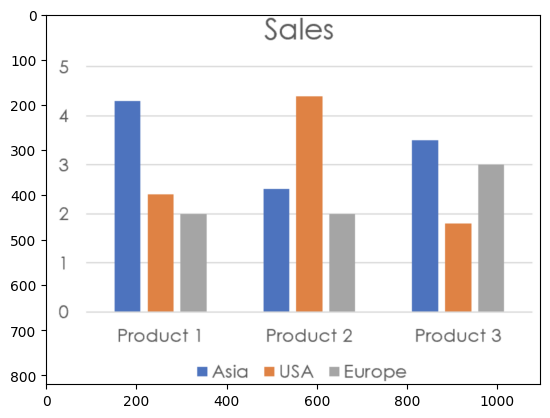

In [50]:
image_file = "data/plot.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [ ]:
img = encode_image(image_file)

prompt = "Describe the image in detail. Be specific about graphs, such as bar plots"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

### Database

In [40]:
import chromadb #0.5.0

db = chromadb.PersistentClient(path="/Users/carlos/Docs/projects/GenerativeAI/RAG/chroma")
db.list_collections()

[Collection(name=nvidia)]

---
Inicio validaciones

In [64]:
db.list_collections()

[Collection(name=nvidia)]

In [65]:
db.count_collections()

1

In [66]:
print(f"Chroma DB settings: {chromadb.get_settings()}")

Chroma DB settings: environment='' chroma_api_impl='chromadb.api.segment.SegmentAPI' chroma_server_nofile=None chroma_server_thread_pool_size=40 tenant_id='default' topic_namespace='default' chroma_server_host=None chroma_server_headers=None chroma_server_http_port=None chroma_server_ssl_enabled=False chroma_server_ssl_verify=None chroma_server_api_default_path='/api/v1' chroma_server_cors_allow_origins=[] is_persistent=False persist_directory='./chroma' chroma_memory_limit_bytes=0 chroma_segment_cache_policy=None allow_reset=False chroma_auth_token_transport_header=None chroma_client_auth_provider=None chroma_client_auth_credentials=None chroma_server_auth_ignore_paths={'/api/v1': ['GET'], '/api/v1/heartbeat': ['GET'], '/api/v1/version': ['GET']} chroma_overwrite_singleton_tenant_database_access_from_auth=False chroma_server_authn_provider=None chroma_server_authn_credentials=None chroma_server_authn_credentials_file=None chroma_server_authz_provider=None chroma_server_authz_config=No

In [63]:
print(f"DB settings: {db.get_settings()}")

Chroma DB settings: environment='' chroma_api_impl='chromadb.api.segment.SegmentAPI' chroma_server_nofile=None chroma_server_thread_pool_size=40 tenant_id='default' topic_namespace='default' chroma_server_host=None chroma_server_headers=None chroma_server_http_port=None chroma_server_ssl_enabled=False chroma_server_ssl_verify=None chroma_server_api_default_path='/api/v1' chroma_server_cors_allow_origins=[] is_persistent=True persist_directory='/Users/carlos/Docs/projects/GenerativeAI/RAG/chroma' chroma_memory_limit_bytes=0 chroma_segment_cache_policy=None allow_reset=False chroma_auth_token_transport_header=None chroma_client_auth_provider=None chroma_client_auth_credentials=None chroma_server_auth_ignore_paths={'/api/v1': ['GET'], '/api/v1/heartbeat': ['GET'], '/api/v1/version': ['GET']} chroma_overwrite_singleton_tenant_database_access_from_auth=False chroma_server_authn_provider=None chroma_server_authn_credentials=None chroma_server_authn_credentials_file=None chroma_server_authz_p

Sugerencia de Copilot para solucionar el error:
Fail: [ONNXRuntimeError] : 1 : FAIL : Non-zero status code returned while running
CoreML_3403379098192686108_1 node. Name:'CoreMLExecutionProvider_CoreML_3403379098192686108_1_1
' Status Message: Error executing model: Unable to compute the prediction using a neural network model.
It can be an invalid input data or broken/unsupported model (error code: -1).

Con esto lo que se hace es verificar que el modelo ONNX esté bien formado

import onnx

model_path = "path/to/your/model.onnx" # El problema es que no tengo un archivo .onnx
model = onnx.load(model_path)
onnx.checker.check_model(model)]

Sugerencia de ChatGPT para solucionar el error:

import onnxruntime as ort

El problema es que no tengo un archivo .onnx

session = ort.InferenceSession('path_to_model.onnx', providers=['CPUExecutionProvider'])

In [ ]:
# Verificar los proveedores disponibles en la máquina
import onnxruntime as ort

print(f"Available providers: {ort.get_available_providers()}")
print(f"Get Device: {ort.get_device()}")
print(f"Build Info: {ort.get_build_info()}")
print(f"All providers: {ort.get_all_providers()}")
print(f"Version string: {ort.get_version_string()}")
#print(f"Model metadata: {ort.ort.ModelMetadata()}")

Available providers: ['CoreMLExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Get Device: CPU
Buil Info: ORT Build Info: git-branch=HEAD, git-commit-id=5c1b7ccbff, build type=Release, cmake cxx flags: -DNDEBUG -Wp,-D_FORTIFY_SOURCE=2 -Wp,-D_GLIBCXX_ASSERTIONS -fstack-protector-strong -O3 -pipe -ffunction-sections -fdata-sections -fvisibility=hidden -fvisibility-inlines-hidden
All providers: ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'MIGraphXExecutionProvider', 'ROCMExecutionProvider', 'OpenVINOExecutionProvider', 'DnnlExecutionProvider', 'TvmExecutionProvider', 'VitisAIExecutionProvider', 'QNNExecutionProvider', 'NnapiExecutionProvider', 'VSINPUExecutionProvider', 'JsExecutionProvider', 'CoreMLExecutionProvider', 'ArmNNExecutionProvider', 'ACLExecutionProvider', 'DmlExecutionProvider', 'RknpuExecutionProvider', 'WebNNExecutionProvider', 'WebGpuExecutionProvider', 'XnnpackExecutionProvider', 'CANNExecutionProvider', 'AzureExecutionProvider', 'CPUExecuti

In [75]:
print(lst_docs[0])

Researchers and developers use our computing solutions to accelerate a wide range of important applications, from simulating molecular dynamics to climate
forecasting. With support for more than 3,500 applications, NVIDIA computing enables some of the most promising areas of discovery, from climate prediction to
materials science and from wind tunnel simulation to genomics. Including GPUs and networking, NVIDIA powers over 75% of the supercomputers on the global
TOP500 list, including 24 of the top 30 systems on the Green500 list.


In [91]:
print(len(lst_docs))

1081


In [76]:
print(lst_metadata[0])

{'title': 'Business', 'keywords': 'simulation, climate, global supercomputing'}


In [77]:
print(lst_ids[0])

4_1


In [92]:
# Pruebas con el método add
from tqdm.notebook import tqdm

# Inicializar variables para almacenar el último elemento insertado con éxito
last_success_index = -1
last_success_doc = None
last_success_id = None
last_success_metadata = None

try:
    for i in tqdm(range(len(lst_docs)), desc="Adding documents to collection"):
        # Insertar el elemento en la colección
        collection.add(documents=[lst_docs[i]], ids=[lst_ids[i]], metadatas=[lst_metadata[i]], 
                       images=None, embeddings=None)
        
        # Actualizar el último elemento insertado con éxito
        last_success_index = i
        last_success_doc = lst_docs[i]
        last_success_id = lst_ids[i]
        last_success_metadata = lst_metadata[i]
except Exception as e:
    # Mostrar información del último elemento insertado con éxito
    print(f"Último elemento insertado con éxito (índice {last_success_index}):")
    print(f"Documento: {last_success_doc}")
    print(f"ID: {last_success_id}")
    print(f"Metadata: {last_success_metadata}")
    
    # Mostrar información del elemento que causó el error
    print(f"Error al insertar el elemento en el índice {i}:")
    print(f"Documento: {lst_docs[i]}")
    print(f"ID: {lst_ids[i]}")
    print(f"Metadata: {lst_metadata[i]}")
    
    # Mostrar el mensaje de error
    print(f"Error: {e}")

Adding documents to collection:   0%|          | 0/1081 [00:00<?, ?it/s]

Borrar un id en una colección
collection.delete(
    ids=['4_1']
)

In [94]:
collection.peek(1)

{'ids': ['10_1'],
 'embeddings': [[-0.04736826941370964,
   0.024773381650447845,
   0.02372901886701584,
   0.00602048309519887,
   0.015512113459408283,
   -0.017776861786842346,
   -0.040332626551389694,
   -0.02259536273777485,
   -0.04197438433766365,
   -0.020587250590324402,
   -0.04203444719314575,
   -0.046725738793611526,
   0.004605933092534542,
   -0.010984479449689388,
   0.04069124162197113,
   0.04329656809568405,
   0.023968767374753952,
   -0.05974310636520386,
   -0.02887757681310177,
   -0.0393667072057724,
   0.010397033765912056,
   -0.0036703331861644983,
   0.061741337180137634,
   -0.08872140198945999,
   0.0051289950497448444,
   -0.013995779678225517,
   -0.0551103875041008,
   0.0014066495932638645,
   0.02032889798283577,
   0.026920072734355927,
   -0.04682005196809769,
   0.08874329924583435,
   -0.029309410601854324,
   0.048326101154088974,
   0.05441207066178322,
   0.010733663104474545,
   -0.059863340109586716,
   -0.035044655203819275,
   -0.00539322

In [95]:
db.list_collections()

[Collection(name=nvidia)]

In [96]:
collection.count()

1081

In [97]:
collection.peek(1)

{'ids': ['10_1'],
 'embeddings': [[-0.04736826941370964,
   0.024773381650447845,
   0.02372901886701584,
   0.00602048309519887,
   0.015512113459408283,
   -0.017776861786842346,
   -0.040332626551389694,
   -0.02259536273777485,
   -0.04197438433766365,
   -0.020587250590324402,
   -0.04203444719314575,
   -0.046725738793611526,
   0.004605933092534542,
   -0.010984479449689388,
   0.04069124162197113,
   0.04329656809568405,
   0.023968767374753952,
   -0.05974310636520386,
   -0.02887757681310177,
   -0.0393667072057724,
   0.010397033765912056,
   -0.0036703331861644983,
   0.061741337180137634,
   -0.08872140198945999,
   0.0051289950497448444,
   -0.013995779678225517,
   -0.0551103875041008,
   0.0014066495932638645,
   0.02032889798283577,
   0.026920072734355927,
   -0.04682005196809769,
   0.08874329924583435,
   -0.029309410601854324,
   0.048326101154088974,
   0.05441207066178322,
   0.010733663104474545,
   -0.059863340109586716,
   -0.035044655203819275,
   -0.00539322

In [98]:
query = "how much is the revenue?"
collection.query(query_texts=[query])

{'ids': [['78_13',
   '78_7',
   '54_11',
   '54_13',
   '37_1',
   '39_2',
   '35_4',
   '78_12',
   '69_5',
   '70_1']],
 'distances': [[0.3877458997610475,
   0.4137847847931928,
   0.6887324452400208,
   0.7076895236968994,
   0.7561168670654297,
   0.7564509510993958,
   0.7685436010360718,
   0.7693564063107363,
   0.8315497636795044,
   0.8593571186065674]],
 'metadatas': [[{'keywords': 'Total revenue (sum of all income)',
    'title': 'Data'},
   {'keywords': 'highest revenue ($60,922); middle revenue ($26,974); lowest revenue ($26,914)',
    'title': 'Data'},
   {'keywords': 'Revenue recognition refers to the process of assigning monetary values to goods or services recognized as income for a period within a year. It involves identifying costs and expenses in generating that income, estimating fair value, and recognizing revenue when performance meets standards.',
    'title': 'Data'},
   {'keywords': 'Sales Revenue, Product, Core Revenue Sources',
    'title': 'Data'},
   {'k

In [99]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'Total revenue Total revenue $ 60,922 $ 26,974 $ 26,914 Revenue Recognition Product Sales Revenue Revenue Recognition Revenue Allowances Concentration of Revenue Revenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago. Revenue: (In millions) Data Center 47,525 15,005 $ 10,613 Gaming 10,447 9,067 12,462 Professional Visualization 1,553 1,544 2,111 Automotive 1,091 903 566 OEM and Other 306 455 1,162 60,922 26,974 $ 26,914 (2) Deferred revenue primarily includes customer advances and deferrals related to support for hardware and software, license and development arrangements, and cloud services. $233 million and $35 million of the balance in fiscal 2024 and 2023 respectively, related to customer advances. invoiced in future periods. Revenue allocated to remaining performance obligations, which includes deferred revenue and amounts that will be invoiced and recognized as revenue in future periods, was $1.1 billion as of January 28, 2024. We expect to recognize approximatel

### LLM Chat

In [ ]:
# Chat with Context only
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the following information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

The total recognized revenue as mentioned in the information provided stands at $26,914 million (or about $26.9 billion) for fiscal year 2selfy 2024. However, it's worth noting that this figure does not include deferred revenue amounts or revenues related to performance obligations with a contract length of one year or less as they will be recognized in future periods based on the completion of certain milestones and deliveries.


In [ ]:
# Chat with knowledge + Context
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the following additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

The total reported revenue as per the information provided is $60,922 million (or $60.9 billion). This figure represents the overall earnings before considering deferred and unearned revenues that will be recognized in future periods based on performance obligations. Revenue recognition for these specific items depends on the completion of those services or fulfillment of contract terms, with estimates suggesting around 40% to be realized within the upcoming year following this fiscal cycle ending January 28, 2024.


In [102]:
# Chat Stream
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}],
                  stream=True)
for chunk in res:
    print(chunk["message"]["content"], end="")

The total recognized revenue provided in your information is $26,914 million as of January 28, 2curing fiscal year (FY) 2024 for Dell Technologies. This amount reflects a significant increase from the previous period wherein deferred revenue was also substantial due to customer advances and support obligations that have yet to be recognized in accordance with accounting principles, which are expected to generate $1.1 billion over twelve months following recognition of such as part for performance obligations on longer contracts beyond a year's duration from the fiscal period ending January 28, 2024.

____

## Versión Original

### Data

pages: 96


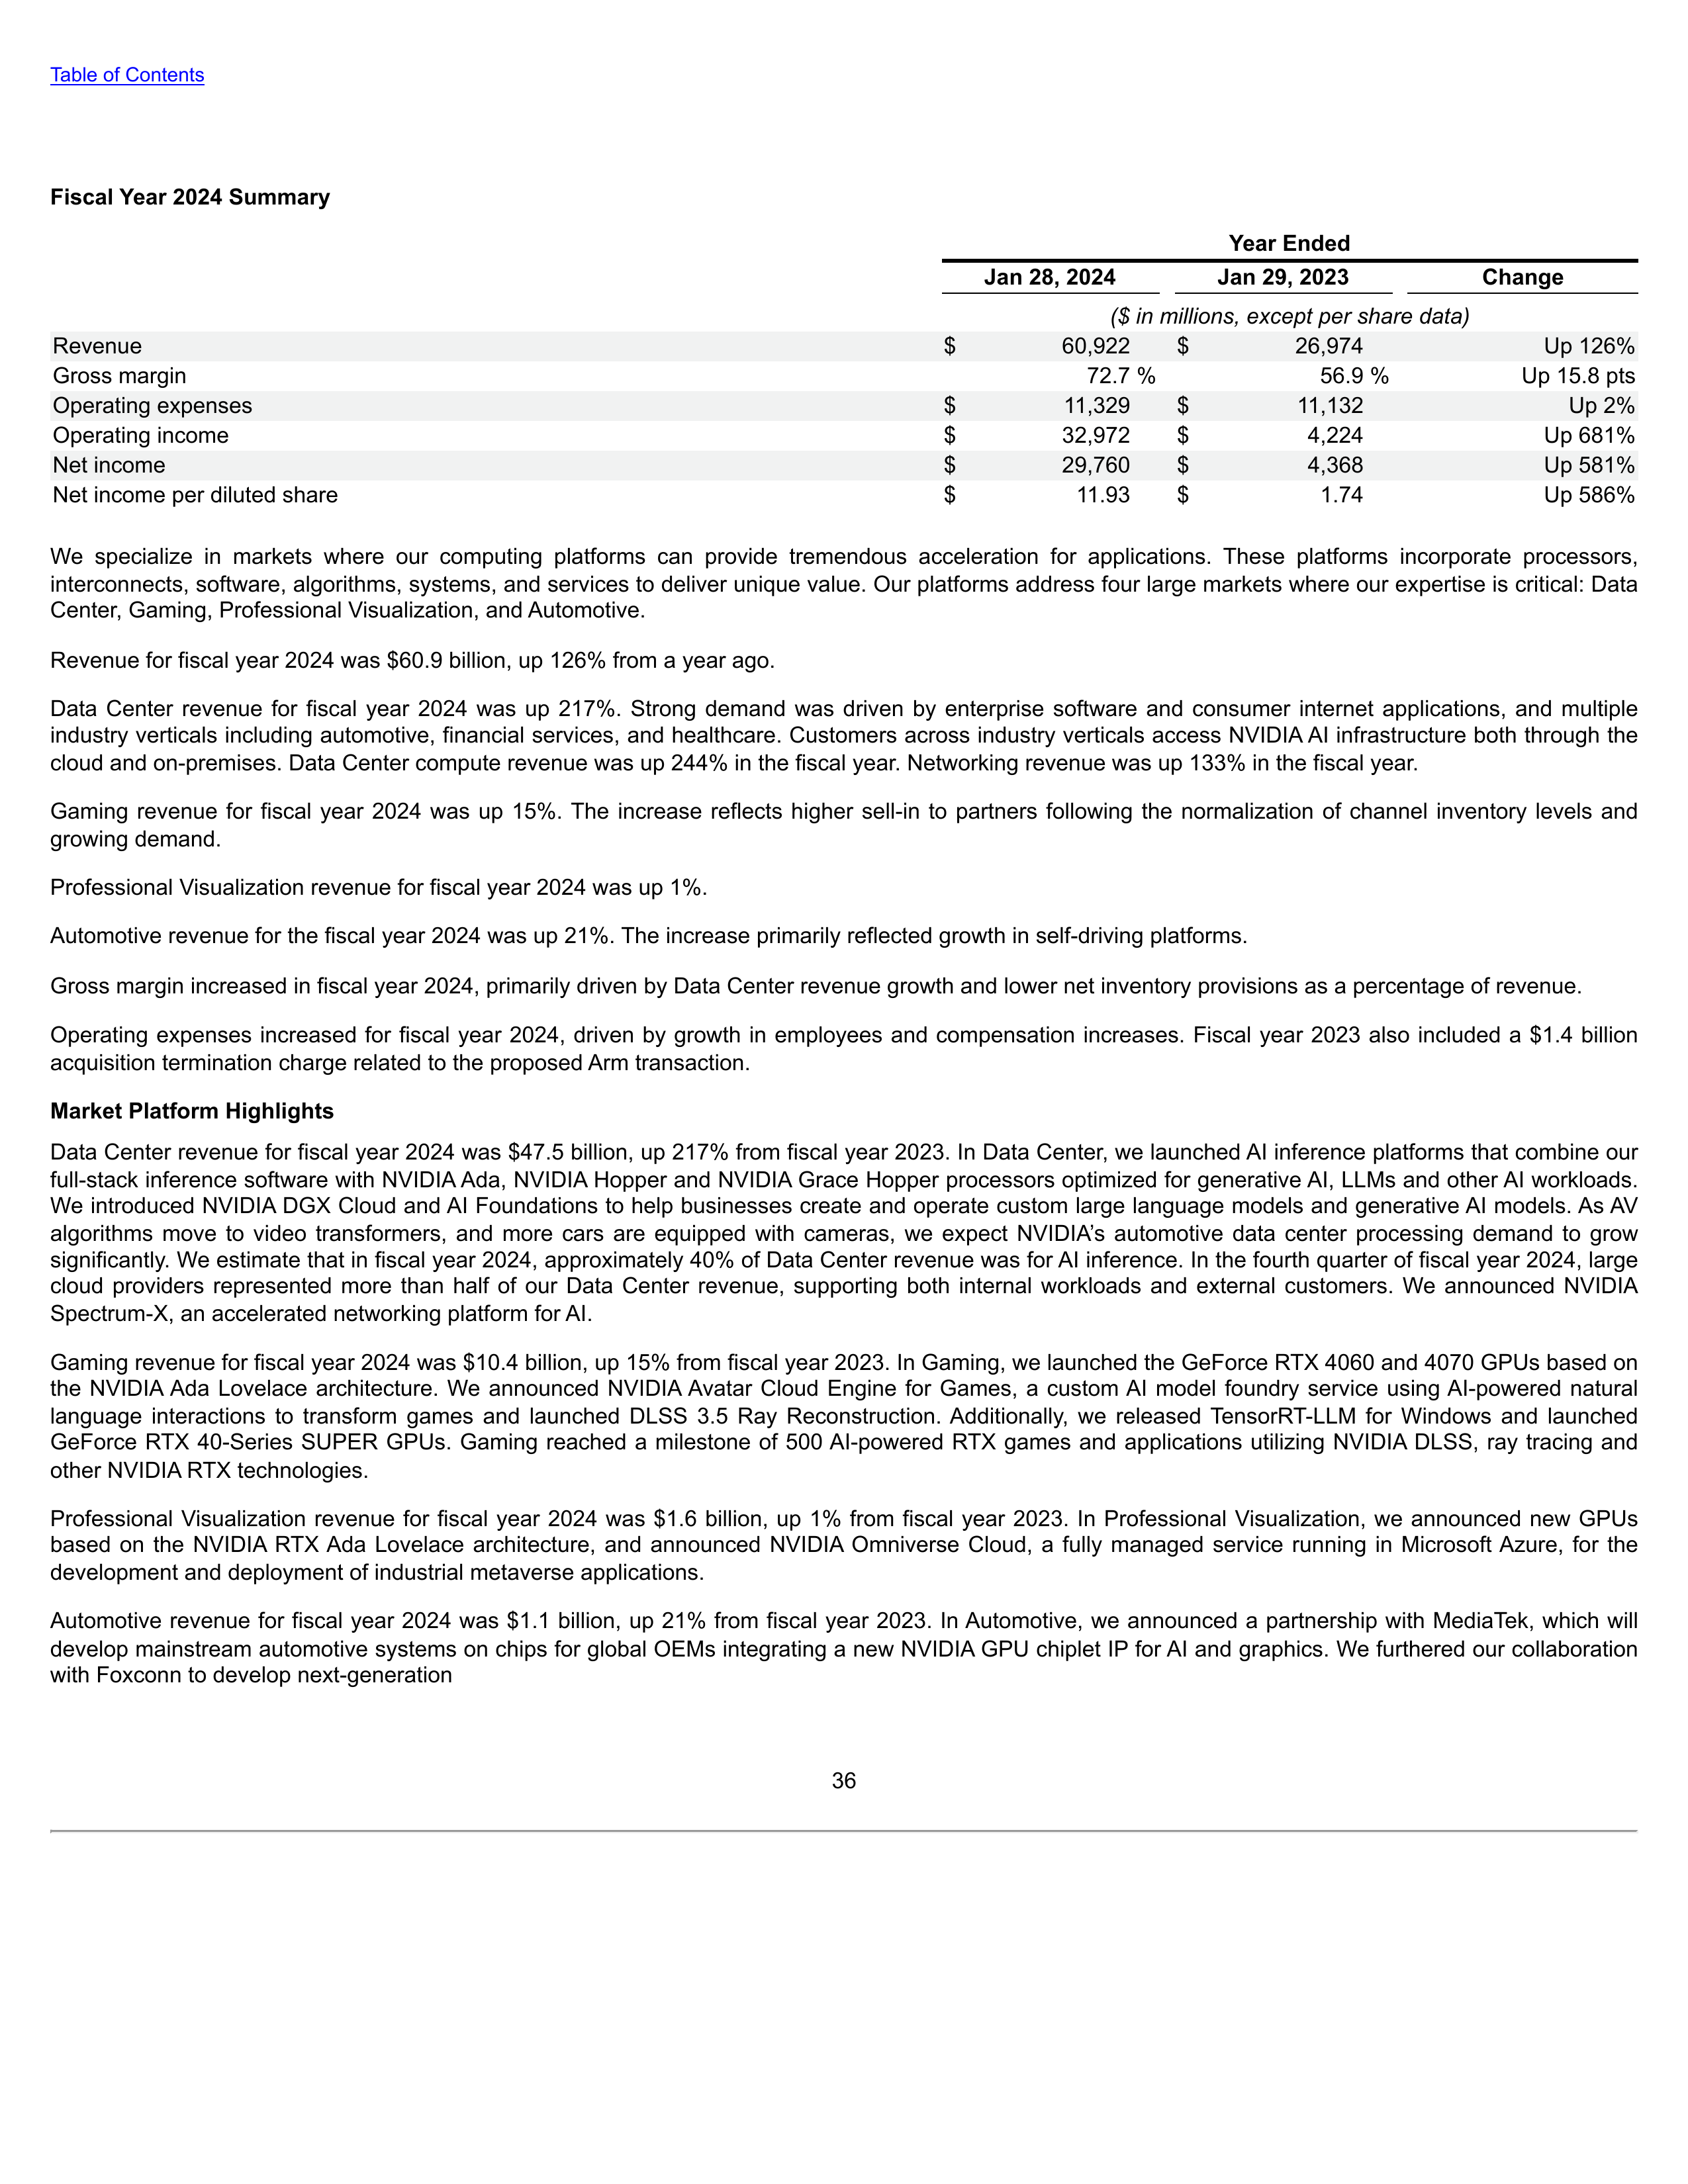

In [ ]:
#conda install -c conda-forge poppler
import pdf2image #1.17.0

doc_img = pdf2image.convert_from_path("data/doc_nvidia.pdf", dpi=300)

print("pages:", len(doc_img))
doc_img[35]

In [ ]:
import pytesseract #0.3.10
from tqdm.notebook import tqdm

doc_txt = []
for page in tqdm(doc_img):
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)
doc_txt[35]

### Preprocessing

In [ ]:
title_map = {
    "4-12":"Business",
    "13-33":"Risk Factors",
    "34-44":"Financials",
    "45-46":"Directors",
    "47-83":"Data"
}

In [ ]:
lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in enumerate(doc_txt):
    try:
        ## get title
        title = [v for k,v in title_map.items() if n in range(int(k.split("-")[0]), int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get paragraph
        for i,p in enumerate(page.split('\n\n')):
            if len(p.strip())>5:
                lst_docs.append(p.strip())
                lst_ids.append(str(n)+"_"+str(i))
                lst_metadata.append({"title":title})
    except:
        continue

print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

1081 = 1081 = 1081


In [ ]:
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials'} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data
Center, Gaming, Professional Visualization, and Automotive. 



### LLM Generator

#### TEXT

##### Using `phi3`
La respuesta sí la puede dar en otro idioma auncuando el prompt esté en inglés, por ejemplo. Funcionó con español, francés, alemán e italiano al tiempo, ...

In [ ]:
import ollama #0.2.1

def keyword_generator(p, top=3):
    prompt = "summarize the following paragraph in 3 keywords separated by , "+p
    res = ollama.generate(model="phi3", prompt=prompt)["response"]

    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()

p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print("Summary using phi3 model:\n", keyword_generator(p))

Summary using phi3 model:
 Creative Design, Generative AI, NVIDIA Workstations


In [ ]:
## ORIGINAL
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator(doc) 

In [ ]:
## Print example
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials', 'keywords': 'Revenue Growth, Net Income, Operating Margin'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials', 'keywords': 'revenue up, gross margin up, profit up'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials', 'keywords': "The platform's components are processors, interconnects, software, algorithms, systems, and services, offering unique value in data centers, gaming, professional visualization, and automotive sectors through acceleration for applications."} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, a

#### TABLE

In [ ]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Summarize the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

Table:
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

Summary:
 The table compares the financial results for two consecutive years, ending on January 28 and Jan. 29 of each respective year (Jan 2024 versus Jan. 2023). Revenue has surged by 126%, from $26,974 million to $60,922 million. Gross margin also increased substantially, up 15.8 percentage points from 56.9% to 72.7%. Despite a marginal increase of only 2% in operating expenses (from $11,132 million to $11,329 million), the company's operating income saw an incredible rise by 681%, from $4,224 million to $32,972 million. Net income followed a similar trend with a substantial increase of 581% (from $4,368 million to $29,760 million). When it comes to n

In [ ]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Give a concise summary of the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

#### IMAGES

Matplotlib is building the font cache; this may take a moment.


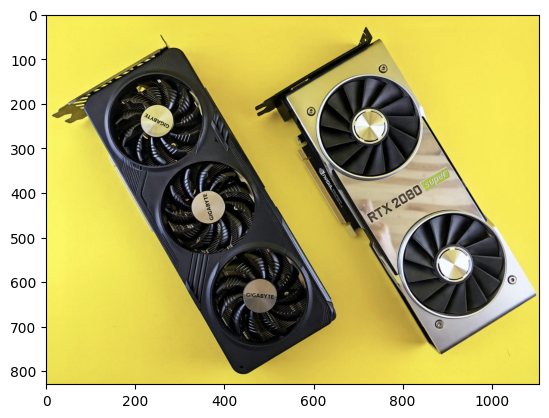

In [ ]:
from matplotlib import image, pyplot

image_file = "data/image.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [ ]:
## Encode the image into a string
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

img = encode_image(image_file)
img[:1000]

'iVBORw0KGgoAAAANSUhEUgAABFQAAAM+CAYAAAA0NVXiAAAKrWlDQ1BJQ0MgUHJvZmlsZQAASImVlwdQU+kWgP9700NCS4iAlNCb9BZASggtgIJ0EIWQBAglxEBQsSPiCq4FFRFUBF0VUHBViiwiIoqFRUDB7oIsCsq6WLCh8i4whN19896bd2bOnO+ee/5zzv/P/WfOBYAszxGJUmB5AFKFGeIgb3d6RGQUHTcMMIAG8EAd6HC46SJmYKA/QGTW/l0+9AFoyt4xncr17+//qyjw+OlcAKBAhON46dxUhM8j+pIrEmcAgDqC+HVWZoimuA1hqhhpEOH7U5www6NTHDfNaDAdExLEQpgKAJ7E4YgTACDRET89k5uA5CG5IWwh5AmECIsQdklNTeMhfAZhQyQG8ZGm8jPi/pIn4W8546Q5OZwEKc/sZVrwHoJ0UQpn9f95HP9bUlMkszX0ESUlin2CEKuInNn95DQ/KQvjFgfMsoA3HT/NiRKf0FnmprOiZpnH8fCTrk1Z7D/L8QIvtjRPBjtklvnpnsGzLE4LktaKF7OYs8wRz9WVJIdK/Yl8tjR/VmJI+CxnCsIWz3J6crDfXAxL6hdLgqT984Xe7nN1vaR7T03/y34FbOnajMQQH+neOXP984XMuZzpEdLeeHwPz7mYUGm8KMNdWkuUEiiN56d4S/3pmcHStRnIBzm3NlB6hkkc38BZBiyQBlIQFQM68EeePADI4K/KmNoIK020WixISMygM5EbxqezhVyzBXQrCysbAKbu68zn8I42fQ8h2s05X/YTAJwjJycnm+Z8/sh5nB8GgDg65zOoAoDcDMD1LVyJOHPGN32XMIAI5AAVqAANoAMMgSmwAnbACbgBT+ALAkAIiATLARckglSk85VgLdgEckE+2AX2gWJQCo6Ck+A0OAvqQRO4DK6BW6AL9IJHoB8MgVdgDHwAExAE4SAyRIFUIE1IDzKBrCAG5AJ5Qv5QEBQJxUIJkBC

In [ ]:
prompt = "describe the image"
res = ollama.generate(model="phi3", prompt=prompt, images=[img])["response"]
print(res)

The image depicts a serene sunset over a mountain lake. The sky is painted with warm colors, transitioning from vibrant oranges to deep purples and red hues at the edges where light fades into darkness. A small boat gently bobs on the water's surface amidst ripples caused by an occasional leaf falling onto it. In the foreground lies a dense coniferous forest, its silhouette outlined against the backdrop of dusk sky with faint wisps of mist rolling over nearby hills and creating shadowy patterns around trees that rise in front of the descending sun. The overall mood conveyed is one of tranquility and natural beauty as day turns into night amidst this picturesque landscape.

[img-1]


In [ ]:
## LLaVA
prompt = "describe the image"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

#### PLOTS

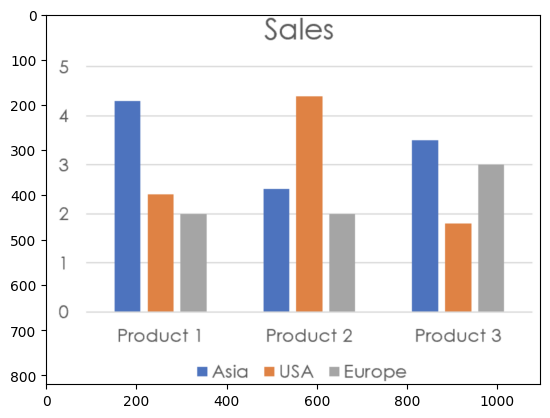

In [ ]:
image_file = "data/plot.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [ ]:
img = encode_image(image_file)

prompt = "Describe the image in detail. Be specific about graphs, such as bar plots"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

### Database

In [ ]:
import chromadb #0.5.0

db = chromadb.PersistentClient(path="/Users/carlos/Docs/projects/GenerativeAI/RAG/chroma")
db.list_collections()

[Collection(name=nvidia)]

In [ ]:
collection_name = "nvidia"

if collection_name in [c.name for c in db.list_collections()]:
    db.delete_collection(collection_name)
    print("--- deleted ---")

collection = db.get_or_create_collection(name=collection_name, 
                                         embedding_function=chromadb.utils.embedding_functions.DefaultEmbeddingFunction())


collection.add(documents=lst_docs, ids=lst_ids, metadatas=lst_metadata, 
               images=None, embeddings=None)

collection.peek(1)

En mi mac da este mensaje de error

Fail: [ONNXRuntimeError] : 1 : FAIL : Non-zero status code returned while running CoreML_3403379098192686108_1 node. Name:'CoreMLExecutionProvider_CoreML_3403379098192686108_1_1' Status Message: Error executing model: Unable to compute the prediction using a neural network model. It can be an invalid input data or broken/unsupported model (error code: -1)

Se solucionó adding the items of the lists (docs, ids and metadata) to the collection in a for loop, one item at a time. It didn't raise any error.

In [ ]:
query = "how much is the revenue?"
collection.query(query_texts=[query])

{'ids': [['78_13',
   '78_7',
   '54_11',
   '54_13',
   '37_1',
   '39_2',
   '35_4',
   '78_12',
   '69_5',
   '70_1']],
 'distances': [[0.3877458997610475,
   0.4137847847931928,
   0.6887324452400208,
   0.7076895236968994,
   0.7561168670654297,
   0.7564509510993958,
   0.7685436010360718,
   0.7693564063107363,
   0.8315497636795044,
   0.8593571186065674]],
 'metadatas': [[{'keywords': 'Total revenue (sum of all income)',
    'title': 'Data'},
   {'keywords': 'highest revenue ($60,922); middle revenue ($26,974); lowest revenue ($26,914)',
    'title': 'Data'},
   {'keywords': 'Revenue recognition refers to the process of assigning monetary values to goods or services recognized as income for a period within a year. It involves identifying costs and expenses in generating that income, estimating fair value, and recognizing revenue when performance meets standards.',
    'title': 'Data'},
   {'keywords': 'Sales Revenue, Product, Core Revenue Sources',
    'title': 'Data'},
   {'k

In [ ]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'Total revenue Total revenue $ 60,922 $ 26,974 $ 26,914 Revenue Recognition Product Sales Revenue Revenue Recognition Revenue Allowances Concentration of Revenue Revenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago. Revenue: (In millions) Data Center 47,525 15,005 $ 10,613 Gaming 10,447 9,067 12,462 Professional Visualization 1,553 1,544 2,111 Automotive 1,091 903 566 OEM and Other 306 455 1,162 60,922 26,974 $ 26,914 (2) Deferred revenue primarily includes customer advances and deferrals related to support for hardware and software, license and development arrangements, and cloud services. $233 million and $35 million of the balance in fiscal 2024 and 2023 respectively, related to customer advances. invoiced in future periods. Revenue allocated to remaining performance obligations, which includes deferred revenue and amounts that will be invoiced and recognized as revenue in future periods, was $1.1 billion as of January 28, 2024. We expect to recognize approximatel

### LLM Chat

In [ ]:
# Chat with Context only
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the following information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

The total recognized revenue as mentioned in the information provided stands at $26,914 million (or about $26.9 billion) for fiscal year 2selfy 2024. However, it's worth noting that this figure does not include deferred revenue amounts or revenues related to performance obligations with a contract length of one year or less as they will be recognized in future periods based on the completion of certain milestones and deliveries.


In [ ]:
# Chat with knowledge + Context
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the following additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

The total reported revenue as per the information provided is $60,922 million (or $60.9 billion). This figure represents the overall earnings before considering deferred and unearned revenues that will be recognized in future periods based on performance obligations. Revenue recognition for these specific items depends on the completion of those services or fulfillment of contract terms, with estimates suggesting around 40% to be realized within the upcoming year following this fiscal cycle ending January 28, 2024.


In [ ]:
# Chat Stream
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}],
                  stream=True)
for chunk in res:
    print(chunk["message"]["content"], end="")

The total recognized revenue provided in your information is $26,914 million as of January 28, 2curing fiscal year (FY) 2024 for Dell Technologies. This amount reflects a significant increase from the previous period wherein deferred revenue was also substantial due to customer advances and support obligations that have yet to be recognized in accordance with accounting principles, which are expected to generate $1.1 billion over twelve months following recognition of such as part for performance obligations on longer contracts beyond a year's duration from the fiscal period ending January 28, 2024.